In [39]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import random
import time

import matplotlib.pyplot as plt

import numpy as np

import os
import sys

In [0]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [0]:

data_dir = '/content/drive/My Drive/raw_data/meme_breeds/'

transformations = transforms.Compose([
    transforms.Resize(80),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
data = datasets.ImageFolder(data_dir, transform = transformations)

In [0]:
n_train_and_valid_examples = int(len(data)*0.85)
n_test_examples = len(data) - n_train_and_valid_examples

train_and_valid_data, test_data = torch.utils.data.random_split(data, 
                                                       [n_train_and_valid_examples, n_test_examples])

n_train_examples = int(len(train_and_valid_data)*0.70)
n_valid_examples = len(train_and_valid_data) - n_train_examples

train_data, valid_data = torch.utils.data.random_split(train_and_valid_data, 
                                                       [n_train_examples, n_valid_examples])

In [45]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 4009
Number of validation examples: 1719
Number of testing examples: 1011


In [0]:
BATCH_SIZE = 64

train_iterator = torch.utils.data.DataLoader(train_data, 
                                             shuffle = True, 
                                             batch_size = BATCH_SIZE)

valid_iterator = torch.utils.data.DataLoader(valid_data, 
                                             batch_size = BATCH_SIZE)

test_iterator = torch.utils.data.DataLoader(test_data, 
                                            batch_size = BATCH_SIZE)

In [0]:
class VGGBlock(nn.Module):
    def __init__(self, in_channels, out_channels, batch_norm):
        super().__init__()
        
        modules = []
        modules.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        if batch_norm:
            modules.append(nn.BatchNorm2d(out_channels))
        modules.append(nn.ReLU(inplace=True))
    
        self.block = nn.Sequential(*modules)
    
    def forward(self, x):
        return self.block(x)

In [0]:

class VGG11(nn.Module):
    def __init__(self, output_dim, block, pool, batch_norm):
        super().__init__()
        
        self.features = nn.Sequential(
            block(3, 64, batch_norm), #in_channels, out_channels
            pool(2, 2), #kernel_size, stride
            block(64, 128, batch_norm),
            pool(2, 2),
            block(128, 256, batch_norm),
            block(256, 256, batch_norm),
            pool(2, 2),
            block(256, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
        )
        
        self.classifier = nn.Linear(512, output_dim)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [0]:

class VGG16(nn.Module):
    def __init__(self, output_dim, block, pool, batch_norm):
        super().__init__()
        
        self.features = nn.Sequential(
            block(3, 64, batch_norm),
            block(64, 64, batch_norm),
            pool(2, 2),
            block(64, 128, batch_norm),
            block(128, 128, batch_norm),
            pool(2, 2),
            block(128, 256, batch_norm),
            block(256, 256, batch_norm),
            block(256, 256, batch_norm),
            pool(2, 2),
            block(256, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
        )
        
        self.classifier = nn.Linear(512, output_dim)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [0]:

class VGG19(nn.Module):
    def __init__(self, output_dim, block, pool, batch_norm):
        super().__init__()
        
        self.features = nn.Sequential(
            block(3, 64, batch_norm),
            block(64, 64, batch_norm),
            pool(2, 2),
            block(64, 128, batch_norm),
            block(128, 128, batch_norm),
            pool(2, 2),
            block(128, 256, batch_norm),
            block(256, 256, batch_norm),
            block(256, 256, batch_norm),
            block(256, 256, batch_norm),
            pool(2, 2),
            block(256, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
        )
        
        self.classifier = nn.Linear(512, output_dim)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [0]:
OUTPUT_DIM = 8
BATCH_NORM = True

vgg11_model = VGG11(OUTPUT_DIM, VGGBlock, nn.MaxPool2d, BATCH_NORM) 
vgg16_model = VGG16(OUTPUT_DIM, VGGBlock, nn.MaxPool2d, BATCH_NORM) 
vgg19_model = VGG19(OUTPUT_DIM, VGGBlock, nn.MaxPool2d, BATCH_NORM)

In [52]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'VGG11 has {count_parameters(vgg11_model):,} trainable parameters')
print(f'VGG16 has {count_parameters(vgg16_model):,} trainable parameters')
print(f'VGG19 has {count_parameters(vgg19_model):,} trainable parameters')

VGG11 has 9,230,088 trainable parameters
VGG16 has 14,727,240 trainable parameters
VGG19 has 20,039,496 trainable parameters


In [53]:
model = VGG11(OUTPUT_DIM, VGGBlock, nn.MaxPool2d, BATCH_NORM)
model

VGG11(
  (features): Sequential(
    (0): VGGBlock(
      (block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): VGGBlock(
      (block): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): VGGBlock(
      (block): Sequential(
        (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
   

In [0]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
criterion = criterion.to(device)

In [0]:
def calculate_accuracy(fx, y):
    preds = fx.argmax(1, keepdim=True)
    correct = preds.eq(y.view_as(preds)).sum()
    acc = correct.float()/preds.shape[0]
    return acc

In [0]:
def train(model, iterator, optimizer, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
                
        fx = model(x)
        
        loss = criterion(fx, y)
        
        acc = calculate_accuracy(fx, y)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
def evaluate(model, iterator, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            fx = model(x)

            loss = criterion(fx, y)

            acc = calculate_accuracy(fx, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [0]:
EPOCHS = 100

best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut5-model.pt')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 2m 50s
	Train Loss: 1.336 | Train Acc: 52.61%
	 Val. Loss: 1.959 |  Val. Acc: 32.44%
Epoch: 02 | Epoch Time: 2m 49s
	Train Loss: 1.251 | Train Acc: 55.22%
	 Val. Loss: 1.787 |  Val. Acc: 38.60%
Epoch: 03 | Epoch Time: 2m 51s
	Train Loss: 1.103 | Train Acc: 60.56%
	 Val. Loss: 2.355 |  Val. Acc: 37.65%
Epoch: 04 | Epoch Time: 2m 57s
	Train Loss: 0.927 | Train Acc: 66.75%
	 Val. Loss: 1.958 |  Val. Acc: 40.00%
Epoch: 05 | Epoch Time: 2m 55s
	Train Loss: 0.775 | Train Acc: 72.28%
	 Val. Loss: 2.126 |  Val. Acc: 44.44%
Epoch: 06 | Epoch Time: 2m 55s
	Train Loss: 0.683 | Train Acc: 75.55%
	 Val. Loss: 2.212 |  Val. Acc: 43.31%
Epoch: 07 | Epoch Time: 2m 54s
	Train Loss: 0.525 | Train Acc: 81.35%
	 Val. Loss: 2.155 |  Val. Acc: 49.71%
Epoch: 08 | Epoch Time: 3m 6s
	Train Loss: 0.360 | Train Acc: 86.77%
	 Val. Loss: 2.795 |  Val. Acc: 44.96%
Epoch: 09 | Epoch Time: 2m 52s
	Train Loss: 0.315 | Train Acc: 88.96%
	 Val. Loss: 3.399 |  Val. Acc: 39.00%
Epoch: 10 | Epoch Ti

In [0]:
model.load_state_dict(torch.load('tut5-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 1.810 | Test Acc: 37.91%


In [163]:
from sklearn.metrics import confusion_matrix

model.load_state_dict(torch.load('/content/drive/My Drive/raw_data/meme_breeds/mlp-model.pt'))

RuntimeError: ignored

In [0]:
test_loss, test_acc = evaluate(model, test_iterator, criterion, device)


In [64]:
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 2.174 | Test Acc: 38.05%


In [0]:
def evaluate_pred(model, iterator, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    fx = []
    y_l = []
    with torch.no_grad():
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)
            y_l += list(y)

            fx += list(model(x).argmax(dim=1))
    return y_l,fx

[tensor(6), tensor(1), tensor(0), tensor(3), tensor(0), tensor(2), tensor(3), tensor(5), tensor(1), tensor(3), tensor(1), tensor(4), tensor(6), tensor(1), tensor(1), tensor(1), tensor(1), tensor(4), tensor(3), tensor(2), tensor(1), tensor(4), tensor(4), tensor(1), tensor(1), tensor(1), tensor(5), tensor(6), tensor(6), tensor(1), tensor(2), tensor(3), tensor(0), tensor(3), tensor(5), tensor(1), tensor(1), tensor(6), tensor(4), tensor(4), tensor(3), tensor(2), tensor(4), tensor(5), tensor(2), tensor(3), tensor(2), tensor(4), tensor(1), tensor(1), tensor(2), tensor(1), tensor(3), tensor(3), tensor(2), tensor(1), tensor(5), tensor(1), tensor(4), tensor(4), tensor(4), tensor(6), tensor(0), tensor(4), tensor(6), tensor(1), tensor(3), tensor(2), tensor(4), tensor(1), tensor(6), tensor(0), tensor(6), tensor(4), tensor(2), tensor(3), tensor(1), tensor(1), tensor(3), tensor(3), tensor(0), tensor(1), tensor(1), tensor(3), tensor(5), tensor(0), tensor(6), tensor(3), tensor(0), tensor(3), tensor(2)

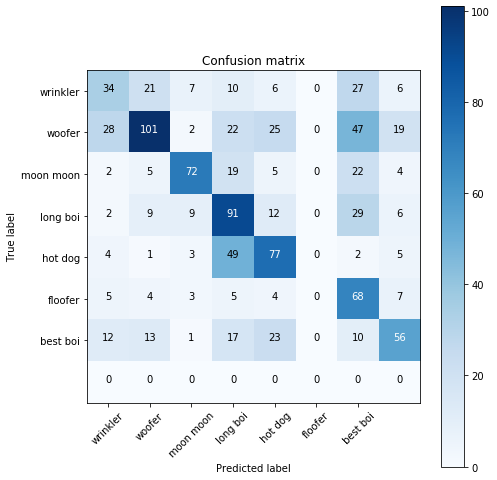

In [161]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def evaluate_pred(model, iterator, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    fx = []
    y_l = []
    with torch.no_grad():
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)
            y_l += list(y)

            fx += list(model(x).argmax(dim=1))
    return y_l,fx
import itertools
x,y = evaluate_pred(model, test_iterator, device)
print(x,y)
cm = confusion_matrix(x, y)
names = ('wrinkler','woofer','moon moon','long boi',' hot dog', 'floofer',' best boi')
plt.figure(figsize=(7,7))
plot_confusion_matrix(cm, names)

Confusion matrix, without normalization
[[ 34  21   7  10   6  27   6]
 [ 28 101   2  22  25  47  19]
 [  2   5  72  19   5  22   4]
 [  2   9   9  91  12  29   6]
 [  4   1   3  49  77   2   5]
 [  5   4   3   5   4  68   7]
 [ 12  13   1  17  23  10  56]]


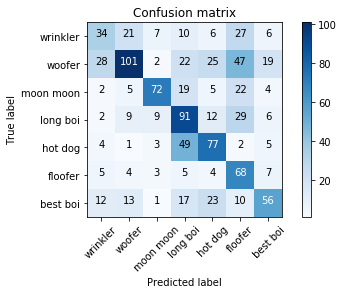

In [160]:
plot_confusion_matrix(np.asarray(cm), names)

In [0]:
from PIL import Image
from torch.autograd import Variable
import torchvision.transforms.functional as TF
import torch
import torch.nn.functional as F
from torch.autograd import Variable

def resize2d(img, size):
    return (F.adaptive_avg_pool2d(Variable(img,volatile=True), size)).data
import random

In [0]:
lis = ['wrinkler','woofer','moon moon','long boi',' hot dog', 'floofer',' best boi']

In [0]:
res = """Epoch: 01 | Epoch Time: 2m 50s
	Train Loss: 1.336 | Train Acc: 52.61%
	 Val. Loss: 1.959 |  Val. Acc: 32.44%
Epoch: 02 | Epoch Time: 2m 49s
	Train Loss: 1.251 | Train Acc: 55.22%
	 Val. Loss: 1.787 |  Val. Acc: 38.60%
Epoch: 03 | Epoch Time: 2m 51s
	Train Loss: 1.103 | Train Acc: 60.56%
	 Val. Loss: 2.355 |  Val. Acc: 37.65%
Epoch: 04 | Epoch Time: 2m 57s
	Train Loss: 0.927 | Train Acc: 66.75%
	 Val. Loss: 1.958 |  Val. Acc: 40.00%
Epoch: 05 | Epoch Time: 2m 55s
	Train Loss: 0.775 | Train Acc: 72.28%
	 Val. Loss: 2.126 |  Val. Acc: 44.44%
Epoch: 06 | Epoch Time: 2m 55s
	Train Loss: 0.683 | Train Acc: 75.55%
	 Val. Loss: 2.212 |  Val. Acc: 43.31%
Epoch: 07 | Epoch Time: 2m 54s
	Train Loss: 0.525 | Train Acc: 81.35%
	 Val. Loss: 2.155 |  Val. Acc: 49.71%
Epoch: 08 | Epoch Time: 3m 6s
	Train Loss: 0.360 | Train Acc: 86.77%
	 Val. Loss: 2.795 |  Val. Acc: 44.96%
Epoch: 09 | Epoch Time: 2m 52s
	Train Loss: 0.315 | Train Acc: 88.96%
	 Val. Loss: 3.399 |  Val. Acc: 39.00%
Epoch: 10 | Epoch Time: 2m 54s
	Train Loss: 0.294 | Train Acc: 89.11%
	 Val. Loss: 2.516 |  Val. Acc: 46.59%
Epoch: 11 | Epoch Time: 2m 59s
	Train Loss: 0.187 | Train Acc: 93.47%
	 Val. Loss: 2.658 |  Val. Acc: 48.44%
Epoch: 12 | Epoch Time: 2m 51s
	Train Loss: 0.180 | Train Acc: 93.46%
	 Val. Loss: 2.884 |  Val. Acc: 47.13%
Epoch: 13 | Epoch Time: 2m 48s
	Train Loss: 0.144 | Train Acc: 94.79%
	 Val. Loss: 2.907 |  Val. Acc: 47.95%
Epoch: 14 | Epoch Time: 2m 52s
	Train Loss: 0.114 | Train Acc: 95.68%
	 Val. Loss: 2.829 |  Val. Acc: 48.88%
Epoch: 15 | Epoch Time: 2m 49s
	Train Loss: 0.093 | Train Acc: 96.21%
	 Val. Loss: 3.217 |  Val. Acc: 48.28%
Epoch: 16 | Epoch Time: 2m 51s
	Train Loss: 0.136 | Train Acc: 94.79%
	 Val. Loss: 3.258 |  Val. Acc: 50.07%
Epoch: 17 | Epoch Time: 2m 51s
	Train Loss: 0.153 | Train Acc: 94.44%
	 Val. Loss: 3.165 |  Val. Acc: 47.61%
Epoch: 18 | Epoch Time: 2m 54s
	Train Loss: 0.109 | Train Acc: 95.84%
	 Val. Loss: 3.019 |  Val. Acc: 48.22%
Epoch: 19 | Epoch Time: 2m 50s
	Train Loss: 0.078 | Train Acc: 96.97%
	 Val. Loss: 3.351 |  Val. Acc: 45.61%
Epoch: 20 | Epoch Time: 2m 51s
	Train Loss: 0.108 | Train Acc: 95.91%
	 Val. Loss: 3.249 |  Val. Acc: 47.01%
Epoch: 21 | Epoch Time: 2m 55s
	Train Loss: 0.112 | Train Acc: 95.52%
	 Val. Loss: 3.098 |  Val. Acc: 49.04%
Epoch: 22 | Epoch Time: 2m 53s
	Train Loss: 0.081 | Train Acc: 97.25%
	 Val. Loss: 3.034 |  Val. Acc: 49.85%
Epoch: 23 | Epoch Time: 2m 54s
	Train Loss: 0.049 | Train Acc: 97.87%
	 Val. Loss: 3.024 |  Val. Acc: 50.55%
Epoch: 24 | Epoch Time: 3m 2s
	Train Loss: 0.061 | Train Acc: 97.64%
	 Val. Loss: 3.231 |  Val. Acc: 49.45%
Epoch: 25 | Epoch Time: 3m 0s
	Train Loss: 0.061 | Train Acc: 97.61%
	 Val. Loss: 3.300 |  Val. Acc: 47.91%
Epoch: 26 | Epoch Time: 2m 52s
	Train Loss: 0.050 | Train Acc: 97.91%
	 Val. Loss: 3.465 |  Val. Acc: 49.42%
Epoch: 27 | Epoch Time: 2m 49s
	Train Loss: 0.059 | Train Acc: 97.42%
	 Val. Loss: 3.540 |  Val. Acc: 47.64%
Epoch: 28 | Epoch Time: 2m 49s
	Train Loss: 0.124 | Train Acc: 95.33%
	 Val. Loss: 3.103 |  Val. Acc: 48.47%
Epoch: 29 | Epoch Time: 2m 49s
	Train Loss: 0.118 | Train Acc: 95.79%
	 Val. Loss: 3.198 |  Val. Acc: 49.32%
Epoch: 30 | Epoch Time: 2m 49s
	Train Loss: 0.066 | Train Acc: 97.38%
	 Val. Loss: 3.164 |  Val. Acc: 48.75%
Epoch: 31 | Epoch Time: 2m 51s
	Train Loss: 0.049 | Train Acc: 97.98%
	 Val. Loss: 3.177 |  Val. Acc: 49.75%
Epoch: 32 | Epoch Time: 2m 50s
	Train Loss: 0.041 | Train Acc: 98.19%
	 Val. Loss: 3.265 |  Val. Acc: 50.26%
Epoch: 33 | Epoch Time: 2m 51s
	Train Loss: 0.043 | Train Acc: 97.98%
	 Val. Loss: 3.372 |  Val. Acc: 49.94%
Epoch: 34 | Epoch Time: 2m 48s
	Train Loss: 0.052 | Train Acc: 97.92%
	 Val. Loss: 3.237 |  Val. Acc: 49.92%
Epoch: 35 | Epoch Time: 2m 48s
	Train Loss: 0.064 | Train Acc: 97.52%
	 Val. Loss: 3.637 |  Val. Acc: 49.94%
Epoch: 36 | Epoch Time: 2m 49s
	Train Loss: 0.071 | Train Acc: 97.07%
	 Val. Loss: 3.290 |  Val. Acc: 50.77%
Epoch: 37 | Epoch Time: 2m 49s
	Train Loss: 0.051 | Train Acc: 97.79%
	 Val. Loss: 3.276 |  Val. Acc: 49.16%
Epoch: 38 | Epoch Time: 2m 50s
	Train Loss: 0.059 | Train Acc: 97.60%
	 Val. Loss: 3.266 |  Val. Acc: 50.34%
Epoch: 39 | Epoch Time: 2m 53s
	Train Loss: 0.072 | Train Acc: 97.09%
	 Val. Loss: 4.108 |  Val. Acc: 48.34%
Epoch: 40 | Epoch Time: 3m 1s
	Train Loss: 0.086 | Train Acc: 96.62%
	 Val. Loss: 3.618 |  Val. Acc: 47.84%
Epoch: 41 | Epoch Time: 2m 56s
	Train Loss: 0.063 | Train Acc: 97.16%
	 Val. Loss: 3.416 |  Val. Acc: 51.20%
Epoch: 42 | Epoch Time: 2m 52s
	Train Loss: 0.054 | Train Acc: 97.51%
	 Val. Loss: 3.271 |  Val. Acc: 49.59%
Epoch: 43 | Epoch Time: 2m 45s
	Train Loss: 0.054 | Train Acc: 97.43%
	 Val. Loss: 3.408 |  Val. Acc: 47.81%
Epoch: 44 | Epoch Time: 2m 45s
	Train Loss: 0.060 | Train Acc: 97.19%
	 Val. Loss: 3.387 |  Val. Acc: 48.81%
Epoch: 45 | Epoch Time: 2m 43s
	Train Loss: 0.048 | Train Acc: 97.68%
	 Val. Loss: 3.825 |  Val. Acc: 49.58%
Epoch: 46 | Epoch Time: 2m 44s
	Train Loss: 0.080 | Train Acc: 96.68%
	 Val. Loss: 3.457 |  Val. Acc: 51.36%
Epoch: 47 | Epoch Time: 2m 50s
	Train Loss: 0.081 | Train Acc: 96.85%
	 Val. Loss: 3.774 |  Val. Acc: 49.97%
Epoch: 48 | Epoch Time: 2m 49s
	Train Loss: 0.066 | Train Acc: 97.06%
	 Val. Loss: 3.515 |  Val. Acc: 49.10%
Epoch: 49 | Epoch Time: 2m 46s
	Train Loss: 0.056 | Train Acc: 97.52%
	 Val. Loss: 3.468 |  Val. Acc: 49.48%
Epoch: 50 | Epoch Time: 2m 46s
	Train Loss: 0.029 | Train Acc: 98.31%
	 Val. Loss: 3.417 |  Val. Acc: 50.54%
Epoch: 51 | Epoch Time: 2m 50s
	Train Loss: 0.020 | Train Acc: 98.73%
	 Val. Loss: 3.405 |  Val. Acc: 51.51%
Epoch: 52 | Epoch Time: 2m 49s
	Train Loss: 0.018 | Train Acc: 98.65%
	 Val. Loss: 3.381 |  Val. Acc: 50.73%
Epoch: 53 | Epoch Time: 2m 49s
	Train Loss: 0.019 | Train Acc: 98.77%
	 Val. Loss: 3.389 |  Val. Acc: 51.10%
Epoch: 54 | Epoch Time: 2m 49s
	Train Loss: 0.018 | Train Acc: 98.86%
	 Val. Loss: 3.430 |  Val. Acc: 51.66%
Epoch: 55 | Epoch Time: 2m 49s
	Train Loss: 0.018 | Train Acc: 98.82%
	 Val. Loss: 3.425 |  Val. Acc: 51.36%
Epoch: 56 | Epoch Time: 2m 46s
	Train Loss: 0.018 | Train Acc: 98.72%
	 Val. Loss: 3.355 |  Val. Acc: 50.80%
Epoch: 57 | Epoch Time: 2m 53s
	Train Loss: 0.017 | Train Acc: 98.82%
	 Val. Loss: 3.421 |  Val. Acc: 51.08%
Epoch: 58 | Epoch Time: 2m 55s
	Train Loss: 0.018 | Train Acc: 98.84%
	 Val. Loss: 3.437 |  Val. Acc: 51.10%
Epoch: 59 | Epoch Time: 3m 5s
	Train Loss: 0.018 | Train Acc: 98.72%
	 Val. Loss: 3.339 |  Val. Acc: 51.40%
Epoch: 60 | Epoch Time: 2m 56s
	Train Loss: 0.019 | Train Acc: 98.67%
	 Val. Loss: 3.362 |  Val. Acc: 51.37%
Epoch: 61 | Epoch Time: 2m 56s
	Train Loss: 0.017 | Train Acc: 98.87%
	 Val. Loss: 3.378 |  Val. Acc: 51.63%
Epoch: 62 | Epoch Time: 2m 49s
	Train Loss: 0.017 | Train Acc: 98.99%
	 Val. Loss: 3.408 |  Val. Acc: 51.99%
Epoch: 63 | Epoch Time: 2m 52s
	Train Loss: 0.017 | Train Acc: 98.65%
	 Val. Loss: 3.368 |  Val. Acc: 51.92%
Epoch: 64 | Epoch Time: 2m 50s
	Train Loss: 0.017 | Train Acc: 98.85%
	 Val. Loss: 3.419 |  Val. Acc: 51.52%
Epoch: 65 | Epoch Time: 2m 52s
	Train Loss: 0.017 | Train Acc: 98.74%
	 Val. Loss: 3.424 |  Val. Acc: 51.25%
Epoch: 66 | Epoch Time: 2m 58s
	Train Loss: 0.017 | Train Acc: 98.75%
	 Val. Loss: 3.465 |  Val. Acc: 51.79%
Epoch: 67 | Epoch Time: 3m 3s
	Train Loss: 0.017 | Train Acc: 98.62%
	 Val. Loss: 3.441 |  Val. Acc: 51.61%
Epoch: 68 | Epoch Time: 2m 53s
	Train Loss: 0.017 | Train Acc: 98.62%
	 Val. Loss: 3.436 |  Val. Acc: 51.82%
Epoch: 69 | Epoch Time: 2m 43s
	Train Loss: 0.018 | Train Acc: 98.61%
	 Val. Loss: 3.421 |  Val. Acc: 51.24%
Epoch: 70 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.73%
	 Val. Loss: 3.455 |  Val. Acc: 51.75%
Epoch: 71 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.62%
	 Val. Loss: 3.488 |  Val. Acc: 51.44%
Epoch: 72 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.84%
	 Val. Loss: 3.512 |  Val. Acc: 51.37%
Epoch: 73 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.73%
	 Val. Loss: 3.488 |  Val. Acc: 50.94%
Epoch: 74 | Epoch Time: 2m 44s
	Train Loss: 0.017 | Train Acc: 98.77%
	 Val. Loss: 3.470 |  Val. Acc: 50.77%
Epoch: 75 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.65%
	 Val. Loss: 3.473 |  Val. Acc: 51.09%
Epoch: 76 | Epoch Time: 2m 43s
	Train Loss: 0.017 | Train Acc: 98.75%
	 Val. Loss: 3.470 |  Val. Acc: 51.35%
Epoch: 77 | Epoch Time: 2m 44s
	Train Loss: 0.018 | Train Acc: 98.62%
	 Val. Loss: 3.519 |  Val. Acc: 51.95%
Epoch: 78 | Epoch Time: 2m 44s
	Train Loss: 0.017 | Train Acc: 98.50%
	 Val. Loss: 3.516 |  Val. Acc: 51.48%
Epoch: 79 | Epoch Time: 2m 44s
	Train Loss: 0.017 | Train Acc: 98.72%
	 Val. Loss: 3.585 |  Val. Acc: 51.54%
Epoch: 80 | Epoch Time: 2m 43s
	Train Loss: 0.018 | Train Acc: 98.62%
	 Val. Loss: 3.505 |  Val. Acc: 51.07%
Epoch: 81 | Epoch Time: 2m 44s
	Train Loss: 0.018 | Train Acc: 98.67%
	 Val. Loss: 3.529 |  Val. Acc: 51.61%
Epoch: 82 | Epoch Time: 2m 44s
	Train Loss: 0.017 | Train Acc: 98.76%
	 Val. Loss: 3.560 |  Val. Acc: 51.46%
Epoch: 83 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.70%
	 Val. Loss: 3.542 |  Val. Acc: 51.19%
Epoch: 84 | Epoch Time: 2m 45s
	Train Loss: 0.018 | Train Acc: 98.74%
	 Val. Loss: 3.555 |  Val. Acc: 51.43%
Epoch: 85 | Epoch Time: 2m 45s
	Train Loss: 0.018 | Train Acc: 98.59%
	 Val. Loss: 3.714 |  Val. Acc: 51.35%
Epoch: 86 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.58%
	 Val. Loss: 3.485 |  Val. Acc: 50.89%
Epoch: 87 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.72%
	 Val. Loss: 3.537 |  Val. Acc: 50.97%
Epoch: 88 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.74%
	 Val. Loss: 3.529 |  Val. Acc: 51.01%
Epoch: 89 | Epoch Time: 2m 44s
	Train Loss: 0.017 | Train Acc: 98.67%
	 Val. Loss: 3.580 |  Val. Acc: 51.22%
Epoch: 90 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.79%
	 Val. Loss: 3.679 |  Val. Acc: 50.66%
Epoch: 91 | Epoch Time: 2m 44s
	Train Loss: 0.018 | Train Acc: 98.71%
	 Val. Loss: 3.608 |  Val. Acc: 51.00%
Epoch: 92 | Epoch Time: 2m 44s
	Train Loss: 0.017 | Train Acc: 98.67%
	 Val. Loss: 3.597 |  Val. Acc: 51.33%
Epoch: 93 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.94%
	 Val. Loss: 3.579 |  Val. Acc: 50.98%
Epoch: 94 | Epoch Time: 2m 46s
	Train Loss: 0.017 | Train Acc: 98.85%
	 Val. Loss: 3.600 |  Val. Acc: 51.17%
Epoch: 95 | Epoch Time: 2m 46s
	Train Loss: 0.017 | Train Acc: 98.92%
	 Val. Loss: 3.631 |  Val. Acc: 51.35%
Epoch: 96 | Epoch Time: 2m 47s
	Train Loss: 0.017 | Train Acc: 98.82%
	 Val. Loss: 3.629 |  Val. Acc: 51.50%
Epoch: 97 | Epoch Time: 2m 46s
	Train Loss: 0.017 | Train Acc: 98.73%
	 Val. Loss: 3.630 |  Val. Acc: 51.40%
Epoch: 98 | Epoch Time: 2m 48s
	Train Loss: 0.017 | Train Acc: 98.87%
	 Val. Loss: 3.672 |  Val. Acc: 51.35%
Epoch: 99 | Epoch Time: 2m 45s
	Train Loss: 0.017 | Train Acc: 98.59%
	 Val. Loss: 3.642 |  Val. Acc: 51.64%
Epoch: 100 | Epoch Time: 2m 44s
	Train Loss: 0.018 | Train Acc: 98.80%
	 Val. Loss: 3.642 |  Val. Acc: 51.29%"""

In [0]:
res = """Epoch: 01 | Epoch Time: 23m 30s
	Train Loss: 1.849 | Train Acc: 27.10%
	 Val. Loss: 1.809 |  Val. Acc: 29.77%
Epoch: 02 | Epoch Time: 0m 42s
	Train Loss: 1.804 | Train Acc: 29.57%
	 Val. Loss: 1.783 |  Val. Acc: 28.72%
Epoch: 03 | Epoch Time: 0m 42s
	Train Loss: 1.784 | Train Acc: 30.88%
	 Val. Loss: 1.757 |  Val. Acc: 31.86%
Epoch: 04 | Epoch Time: 0m 41s
	Train Loss: 1.768 | Train Acc: 30.16%
	 Val. Loss: 1.779 |  Val. Acc: 29.54%
Epoch: 05 | Epoch Time: 0m 42s
	Train Loss: 1.751 | Train Acc: 32.85%
	 Val. Loss: 1.757 |  Val. Acc: 34.42%
Epoch: 06 | Epoch Time: 0m 41s
	Train Loss: 1.727 | Train Acc: 34.12%
	 Val. Loss: 1.749 |  Val. Acc: 32.53%
Epoch: 07 | Epoch Time: 0m 40s
	Train Loss: 1.678 | Train Acc: 35.20%
	 Val. Loss: 1.690 |  Val. Acc: 35.49%
Epoch: 08 | Epoch Time: 0m 41s
	Train Loss: 1.630 | Train Acc: 38.36%
	 Val. Loss: 1.698 |  Val. Acc: 36.96%
Epoch: 09 | Epoch Time: 0m 41s
	Train Loss: 1.565 | Train Acc: 41.17%
	 Val. Loss: 1.733 |  Val. Acc: 33.98%
Epoch: 10 | Epoch Time: 0m 40s
	Train Loss: 1.484 | Train Acc: 44.38%
	 Val. Loss: 1.701 |  Val. Acc: 39.01%
Epoch: 11 | Epoch Time: 0m 41s
	Train Loss: 1.369 | Train Acc: 49.06%
	 Val. Loss: 1.718 |  Val. Acc: 39.75%
Epoch: 12 | Epoch Time: 0m 41s
	Train Loss: 1.270 | Train Acc: 52.11%
	 Val. Loss: 1.835 |  Val. Acc: 40.38%
Epoch: 13 | Epoch Time: 0m 40s
	Train Loss: 1.130 | Train Acc: 57.34%
	 Val. Loss: 1.807 |  Val. Acc: 39.80%
Epoch: 14 | Epoch Time: 0m 40s
	Train Loss: 0.998 | Train Acc: 62.55%
	 Val. Loss: 2.036 |  Val. Acc: 38.66%
Epoch: 15 | Epoch Time: 0m 41s
	Train Loss: 0.860 | Train Acc: 68.35%
	 Val. Loss: 1.999 |  Val. Acc: 40.87%
Epoch: 16 | Epoch Time: 0m 40s
	Train Loss: 0.758 | Train Acc: 71.91%
	 Val. Loss: 2.223 |  Val. Acc: 42.41%
Epoch: 17 | Epoch Time: 0m 41s
	Train Loss: 0.645 | Train Acc: 75.74%
	 Val. Loss: 2.252 |  Val. Acc: 42.54%
Epoch: 18 | Epoch Time: 0m 41s
	Train Loss: 0.524 | Train Acc: 81.11%
	 Val. Loss: 2.440 |  Val. Acc: 41.74%
Epoch: 19 | Epoch Time: 0m 41s
	Train Loss: 0.414 | Train Acc: 85.40%
	 Val. Loss: 2.607 |  Val. Acc: 43.31%
Epoch: 20 | Epoch Time: 0m 42s
	Train Loss: 0.402 | Train Acc: 86.02%
	 Val. Loss: 2.723 |  Val. Acc: 43.26%
Epoch: 21 | Epoch Time: 0m 42s
	Train Loss: 0.346 | Train Acc: 88.34%
	 Val. Loss: 2.772 |  Val. Acc: 43.18%
Epoch: 22 | Epoch Time: 0m 42s
	Train Loss: 0.310 | Train Acc: 89.61%
	 Val. Loss: 2.908 |  Val. Acc: 45.13%
Epoch: 23 | Epoch Time: 0m 42s
	Train Loss: 0.218 | Train Acc: 92.70%
	 Val. Loss: 3.152 |  Val. Acc: 44.53%
Epoch: 24 | Epoch Time: 0m 43s
	Train Loss: 0.207 | Train Acc: 93.52%
	 Val. Loss: 3.198 |  Val. Acc: 44.40%
Epoch: 25 | Epoch Time: 0m 43s
	Train Loss: 0.240 | Train Acc: 92.47%
	 Val. Loss: 2.927 |  Val. Acc: 44.74%
Epoch: 26 | Epoch Time: 0m 43s
	Train Loss: 0.176 | Train Acc: 94.63%
	 Val. Loss: 3.036 |  Val. Acc: 44.32%
Epoch: 27 | Epoch Time: 0m 44s
	Train Loss: 0.157 | Train Acc: 95.01%
	 Val. Loss: 3.423 |  Val. Acc: 44.50%
Epoch: 28 | Epoch Time: 0m 43s
	Train Loss: 0.148 | Train Acc: 95.43%
	 Val. Loss: 3.157 |  Val. Acc: 46.28%
Epoch: 29 | Epoch Time: 0m 43s
	Train Loss: 0.116 | Train Acc: 96.08%
	 Val. Loss: 3.639 |  Val. Acc: 44.56%
Epoch: 30 | Epoch Time: 0m 42s
	Train Loss: 0.125 | Train Acc: 96.49%
	 Val. Loss: 2.948 |  Val. Acc: 44.49%
Epoch: 31 | Epoch Time: 0m 42s
	Train Loss: 0.111 | Train Acc: 96.86%
	 Val. Loss: 3.069 |  Val. Acc: 45.04%
Epoch: 32 | Epoch Time: 0m 42s
	Train Loss: 0.054 | Train Acc: 98.45%
	 Val. Loss: 3.773 |  Val. Acc: 45.37%
Epoch: 33 | Epoch Time: 0m 42s
	Train Loss: 0.080 | Train Acc: 97.53%
	 Val. Loss: 3.816 |  Val. Acc: 44.36%
Epoch: 34 | Epoch Time: 0m 43s
	Train Loss: 0.103 | Train Acc: 96.85%
	 Val. Loss: 3.572 |  Val. Acc: 45.71%
Epoch: 35 | Epoch Time: 0m 43s
	Train Loss: 0.062 | Train Acc: 98.21%
	 Val. Loss: 3.753 |  Val. Acc: 44.78%
Epoch: 36 | Epoch Time: 0m 43s
	Train Loss: 0.096 | Train Acc: 97.18%
	 Val. Loss: 3.360 |  Val. Acc: 43.82%
Epoch: 37 | Epoch Time: 0m 43s
	Train Loss: 0.103 | Train Acc: 96.56%
	 Val. Loss: 3.658 |  Val. Acc: 44.42%
Epoch: 38 | Epoch Time: 0m 43s
	Train Loss: 0.078 | Train Acc: 97.64%
	 Val. Loss: 3.864 |  Val. Acc: 44.97%
Epoch: 39 | Epoch Time: 0m 44s
	Train Loss: 0.099 | Train Acc: 96.99%
	 Val. Loss: 3.216 |  Val. Acc: 45.93%
Epoch: 40 | Epoch Time: 0m 43s
	Train Loss: 0.067 | Train Acc: 97.79%
	 Val. Loss: 4.170 |  Val. Acc: 45.89%
Epoch: 41 | Epoch Time: 0m 46s
	Train Loss: 0.067 | Train Acc: 97.93%
	 Val. Loss: 4.145 |  Val. Acc: 45.64%
Epoch: 42 | Epoch Time: 0m 44s
	Train Loss: 0.077 | Train Acc: 98.07%
	 Val. Loss: 3.846 |  Val. Acc: 45.08%
Epoch: 43 | Epoch Time: 0m 44s
	Train Loss: 0.082 | Train Acc: 97.63%
	 Val. Loss: 3.559 |  Val. Acc: 44.38%
Epoch: 44 | Epoch Time: 0m 43s
	Train Loss: 0.046 | Train Acc: 98.67%
	 Val. Loss: 4.060 |  Val. Acc: 45.95%
Epoch: 45 | Epoch Time: 0m 43s
	Train Loss: 0.061 | Train Acc: 98.07%
	 Val. Loss: 3.807 |  Val. Acc: 44.62%
Epoch: 46 | Epoch Time: 0m 43s
	Train Loss: 0.071 | Train Acc: 98.05%
	 Val. Loss: 4.044 |  Val. Acc: 45.29%
Epoch: 47 | Epoch Time: 0m 43s
	Train Loss: 0.077 | Train Acc: 97.48%
	 Val. Loss: 3.846 |  Val. Acc: 44.57%
Epoch: 48 | Epoch Time: 0m 44s
	Train Loss: 0.084 | Train Acc: 97.98%
	 Val. Loss: 4.335 |  Val. Acc: 44.62%
Epoch: 49 | Epoch Time: 0m 44s
	Train Loss: 0.096 | Train Acc: 97.31%
	 Val. Loss: 3.838 |  Val. Acc: 44.91%
Epoch: 50 | Epoch Time: 0m 44s
	Train Loss: 0.109 | Train Acc: 96.95%
	 Val. Loss: 3.481 |  Val. Acc: 45.03%
Epoch: 51 | Epoch Time: 0m 43s
	Train Loss: 0.077 | Train Acc: 97.79%
	 Val. Loss: 3.716 |  Val. Acc: 45.25%
Epoch: 52 | Epoch Time: 0m 43s
	Train Loss: 0.047 | Train Acc: 98.61%
	 Val. Loss: 4.813 |  Val. Acc: 45.82%
Epoch: 53 | Epoch Time: 0m 43s
	Train Loss: 0.057 | Train Acc: 98.55%
	 Val. Loss: 3.907 |  Val. Acc: 44.01%
Epoch: 54 | Epoch Time: 0m 43s
	Train Loss: 0.085 | Train Acc: 97.79%
	 Val. Loss: 3.410 |  Val. Acc: 43.90%
Epoch: 55 | Epoch Time: 0m 44s
	Train Loss: 0.073 | Train Acc: 98.13%
	 Val. Loss: 4.206 |  Val. Acc: 44.76%
Epoch: 56 | Epoch Time: 0m 44s
	Train Loss: 0.059 | Train Acc: 98.16%
	 Val. Loss: 3.977 |  Val. Acc: 44.52%
Epoch: 57 | Epoch Time: 0m 44s
	Train Loss: 0.056 | Train Acc: 98.77%
	 Val. Loss: 3.486 |  Val. Acc: 45.09%
Epoch: 58 | Epoch Time: 0m 44s
	Train Loss: 0.039 | Train Acc: 98.78%
	 Val. Loss: 4.257 |  Val. Acc: 45.19%
Epoch: 59 | Epoch Time: 0m 44s
	Train Loss: 0.023 | Train Acc: 99.31%
	 Val. Loss: 4.658 |  Val. Acc: 45.15%
Epoch: 60 | Epoch Time: 0m 43s
	Train Loss: 0.039 | Train Acc: 98.91%
	 Val. Loss: 4.227 |  Val. Acc: 44.59%
Epoch: 61 | Epoch Time: 0m 44s
	Train Loss: 0.036 | Train Acc: 98.89%
	 Val. Loss: 4.915 |  Val. Acc: 44.76%
Epoch: 62 | Epoch Time: 0m 44s
	Train Loss: 0.076 | Train Acc: 97.88%
	 Val. Loss: 3.614 |  Val. Acc: 44.62%
Epoch: 63 | Epoch Time: 0m 44s
	Train Loss: 0.043 | Train Acc: 98.87%
	 Val. Loss: 4.118 |  Val. Acc: 45.34%
Epoch: 64 | Epoch Time: 0m 43s
	Train Loss: 0.031 | Train Acc: 99.12%
	 Val. Loss: 4.316 |  Val. Acc: 44.59%
Epoch: 65 | Epoch Time: 0m 44s
	Train Loss: 0.078 | Train Acc: 97.75%
	 Val. Loss: 3.411 |  Val. Acc: 44.62%
Epoch: 66 | Epoch Time: 0m 44s
	Train Loss: 0.038 | Train Acc: 99.06%
	 Val. Loss: 4.490 |  Val. Acc: 45.70%
Epoch: 67 | Epoch Time: 0m 45s
	Train Loss: 0.050 | Train Acc: 98.76%
	 Val. Loss: 4.809 |  Val. Acc: 45.37%
Epoch: 68 | Epoch Time: 0m 45s
	Train Loss: 0.048 | Train Acc: 98.86%
	 Val. Loss: 4.824 |  Val. Acc: 45.89%
Epoch: 69 | Epoch Time: 0m 46s
	Train Loss: 0.060 | Train Acc: 98.45%
	 Val. Loss: 4.306 |  Val. Acc: 45.94%
Epoch: 70 | Epoch Time: 0m 45s
	Train Loss: 0.085 | Train Acc: 97.63%
	 Val. Loss: 3.641 |  Val. Acc: 45.19%
Epoch: 71 | Epoch Time: 0m 44s
	Train Loss: 0.037 | Train Acc: 98.70%
	 Val. Loss: 4.878 |  Val. Acc: 46.01%
Epoch: 72 | Epoch Time: 0m 44s
	Train Loss: 0.072 | Train Acc: 98.04%
	 Val. Loss: 4.451 |  Val. Acc: 45.66%
Epoch: 73 | Epoch Time: 0m 45s
	Train Loss: 0.031 | Train Acc: 99.13%
	 Val. Loss: 4.759 |  Val. Acc: 44.51%
Epoch: 74 | Epoch Time: 0m 45s
	Train Loss: 0.089 | Train Acc: 97.99%
	 Val. Loss: 3.190 |  Val. Acc: 44.67%
Epoch: 75 | Epoch Time: 0m 44s
	Train Loss: 0.045 | Train Acc: 98.81%
	 Val. Loss: 4.434 |  Val. Acc: 46.56%
Epoch: 76 | Epoch Time: 0m 45s
	Train Loss: 0.062 | Train Acc: 98.22%
	 Val. Loss: 3.854 |  Val. Acc: 46.52%
Epoch: 77 | Epoch Time: 0m 45s
	Train Loss: 0.085 | Train Acc: 97.74%
	 Val. Loss: 3.752 |  Val. Acc: 45.86%
Epoch: 78 | Epoch Time: 0m 45s
	Train Loss: 0.055 | Train Acc: 98.65%
	 Val. Loss: 4.050 |  Val. Acc: 47.01%
Epoch: 79 | Epoch Time: 0m 45s
	Train Loss: 0.040 | Train Acc: 99.04%
	 Val. Loss: 4.373 |  Val. Acc: 47.98%
Epoch: 80 | Epoch Time: 0m 44s
	Train Loss: 0.044 | Train Acc: 98.98%
	 Val. Loss: 3.937 |  Val. Acc: 46.95%
Epoch: 81 | Epoch Time: 0m 44s
	Train Loss: 0.071 | Train Acc: 98.35%
	 Val. Loss: 4.405 |  Val. Acc: 45.99%
Epoch: 82 | Epoch Time: 0m 45s
	Train Loss: 0.038 | Train Acc: 99.21%
	 Val. Loss: 4.685 |  Val. Acc: 46.25%
Epoch: 83 | Epoch Time: 0m 44s
	Train Loss: 0.082 | Train Acc: 98.11%
	 Val. Loss: 3.395 |  Val. Acc: 45.53%
Epoch: 84 | Epoch Time: 0m 44s
	Train Loss: 0.037 | Train Acc: 99.21%
	 Val. Loss: 4.930 |  Val. Acc: 46.06%
Epoch: 85 | Epoch Time: 0m 44s
	Train Loss: 0.041 | Train Acc: 98.99%
	 Val. Loss: 4.456 |  Val. Acc: 46.54%
Epoch: 86 | Epoch Time: 0m 44s
	Train Loss: 0.071 | Train Acc: 98.31%
	 Val. Loss: 3.553 |  Val. Acc: 45.76%
Epoch: 87 | Epoch Time: 0m 44s
	Train Loss: 0.039 | Train Acc: 99.13%
	 Val. Loss: 4.115 |  Val. Acc: 47.03%
Epoch: 88 | Epoch Time: 0m 44s
	Train Loss: 0.044 | Train Acc: 98.78%
	 Val. Loss: 3.809 |  Val. Acc: 45.87%
Epoch: 89 | Epoch Time: 0m 44s
	Train Loss: 0.052 | Train Acc: 98.67%
	 Val. Loss: 4.410 |  Val. Acc: 46.13%
Epoch: 90 | Epoch Time: 0m 44s
	Train Loss: 0.047 | Train Acc: 98.75%
	 Val. Loss: 4.813 |  Val. Acc: 46.12%
Epoch: 91 | Epoch Time: 0m 43s
	Train Loss: 0.068 | Train Acc: 98.54%
	 Val. Loss: 4.758 |  Val. Acc: 46.13%
Epoch: 92 | Epoch Time: 0m 43s
	Train Loss: 0.030 | Train Acc: 99.21%
	 Val. Loss: 4.951 |  Val. Acc: 45.60%
Epoch: 93 | Epoch Time: 0m 43s
	Train Loss: 0.052 | Train Acc: 98.63%
	 Val. Loss: 4.028 |  Val. Acc: 45.26%
Epoch: 94 | Epoch Time: 0m 43s
	Train Loss: 0.039 | Train Acc: 98.96%
	 Val. Loss: 5.290 |  Val. Acc: 45.29%
Epoch: 95 | Epoch Time: 0m 43s
	Train Loss: 0.071 | Train Acc: 98.08%
	 Val. Loss: 3.954 |  Val. Acc: 46.11%
Epoch: 96 | Epoch Time: 0m 44s
	Train Loss: 0.037 | Train Acc: 99.17%
	 Val. Loss: 5.647 |  Val. Acc: 46.34%
Epoch: 97 | Epoch Time: 0m 44s
	Train Loss: 0.038 | Train Acc: 98.76%
	 Val. Loss: 4.869 |  Val. Acc: 43.96%
Epoch: 98 | Epoch Time: 0m 43s
	Train Loss: 0.091 | Train Acc: 97.53%
	 Val. Loss: 3.575 |  Val. Acc: 43.52%
Epoch: 99 | Epoch Time: 0m 44s
	Train Loss: 0.059 | Train Acc: 98.36%
	 Val. Loss: 4.038 |  Val. Acc: 44.93%
Epoch: 100 | Epoch Time: 0m 43s
	Train Loss: 0.027 | Train Acc: 99.38%
	 Val. Loss: 4.639 |  Val. Acc: 44.57%"""

In [0]:
res = """Epoch: 01 | Epoch Time: 0m 42s
	Train Loss: 1.872 | Train Acc: 27.82%
	 Val. Loss: 1.788 |  Val. Acc: 29.70%
Epoch: 02 | Epoch Time: 0m 42s
	Train Loss: 1.753 | Train Acc: 32.36%
	 Val. Loss: 1.755 |  Val. Acc: 31.71%
Epoch: 03 | Epoch Time: 0m 42s
	Train Loss: 1.679 | Train Acc: 36.08%
	 Val. Loss: 1.733 |  Val. Acc: 33.15%
Epoch: 04 | Epoch Time: 0m 43s
	Train Loss: 1.604 | Train Acc: 39.64%
	 Val. Loss: 1.733 |  Val. Acc: 34.12%
Epoch: 05 | Epoch Time: 0m 42s
	Train Loss: 1.513 | Train Acc: 42.45%
	 Val. Loss: 1.745 |  Val. Acc: 35.80%
Epoch: 06 | Epoch Time: 0m 42s
	Train Loss: 1.433 | Train Acc: 46.70%
	 Val. Loss: 1.756 |  Val. Acc: 36.84%
Epoch: 07 | Epoch Time: 0m 42s
	Train Loss: 1.326 | Train Acc: 50.59%
	 Val. Loss: 1.809 |  Val. Acc: 36.82%
Epoch: 08 | Epoch Time: 0m 42s
	Train Loss: 1.266 | Train Acc: 52.76%
	 Val. Loss: 1.899 |  Val. Acc: 34.87%
Epoch: 09 | Epoch Time: 0m 42s
	Train Loss: 1.141 | Train Acc: 57.52%
	 Val. Loss: 1.986 |  Val. Acc: 38.17%
Epoch: 10 | Epoch Time: 0m 42s
	Train Loss: 1.077 | Train Acc: 60.51%
	 Val. Loss: 2.131 |  Val. Acc: 34.61%
Epoch: 11 | Epoch Time: 0m 43s
	Train Loss: 0.992 | Train Acc: 64.35%
	 Val. Loss: 1.946 |  Val. Acc: 37.29%
Epoch: 12 | Epoch Time: 0m 42s
	Train Loss: 0.865 | Train Acc: 68.65%
	 Val. Loss: 2.178 |  Val. Acc: 37.82%
Epoch: 13 | Epoch Time: 0m 41s
	Train Loss: 0.848 | Train Acc: 70.10%
	 Val. Loss: 2.115 |  Val. Acc: 38.50%
Epoch: 14 | Epoch Time: 0m 42s
	Train Loss: 0.757 | Train Acc: 73.74%
	 Val. Loss: 2.430 |  Val. Acc: 41.82%
Epoch: 15 | Epoch Time: 0m 42s
	Train Loss: 0.750 | Train Acc: 73.57%
	 Val. Loss: 2.392 |  Val. Acc: 42.67%
Epoch: 16 | Epoch Time: 0m 42s
	Train Loss: 0.622 | Train Acc: 77.38%
	 Val. Loss: 2.590 |  Val. Acc: 41.61%
Epoch: 17 | Epoch Time: 0m 41s
	Train Loss: 0.665 | Train Acc: 76.36%
	 Val. Loss: 2.479 |  Val. Acc: 40.68%
Epoch: 18 | Epoch Time: 0m 42s
	Train Loss: 0.526 | Train Acc: 81.03%
	 Val. Loss: 3.016 |  Val. Acc: 41.10%
Epoch: 19 | Epoch Time: 0m 43s
	Train Loss: 0.603 | Train Acc: 79.73%
	 Val. Loss: 2.546 |  Val. Acc: 42.07%
Epoch: 20 | Epoch Time: 0m 42s
	Train Loss: 0.506 | Train Acc: 82.18%
	 Val. Loss: 2.874 |  Val. Acc: 40.66%"""

In [0]:
res = res.split(':')
res = [x for y in res for x in y.split('|')]
train_loss = []
train_acc= []
val_loss= []
val_acc= []
for epoch in range(1,21):
  epoc = res[(epoch-1)*9+1:(epoch)*9+1]
  train_loss += [epoc[3]]
  train_acc += [epoc[5]]
  val_loss += [epoc[6]]
  val_acc += [epoc[8]]
train_loss = [float(x) for x in train_loss]
train_acc = [float(x.split('%')[0]) for x in train_acc ]
val_loss = [float(x) for x in val_loss]
val_acc = [float(x.split('%')[0]) for x in val_acc ]

In [0]:
import seaborn as sb
import pandas as pd

In [0]:
years = list(range(1, 21))
data_preproc = pd.DataFrame({
    'Epoch': years, 
    'train_loss': train_loss,
    'val_loss': val_loss,})
data_preproc_2 = pd.DataFrame({
    'Epoch': years, 
    'train_acc': train_acc,
    'val_acc': val_acc})

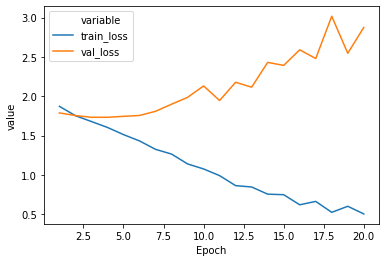

In [181]:
sb.lineplot(x='Epoch', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Epoch']))

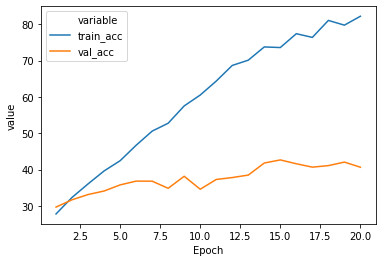

In [182]:
sb.lineplot(x='Epoch', y='value', hue='variable', 
             data=pd.melt(data_preproc_2, ['Epoch']))